In [199]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from datetime import datetime
# %matplotlib inline
# import seaborn as sns

In [200]:
df = pd.read_csv('moviedf.csv')

In [201]:
df = df.drop('foreign', axis=1)
df = df.drop('hungary', axis=1)
df = df.drop('foreign_dist', axis=1)

In [202]:
converted = df.copy()

In [203]:
converted['dtg'] = df['dtg'].apply(lambda x: str(x))
converted['dtg'] = converted['dtg'].apply(lambda x: x.replace('$', '').replace(',',''))
converted['dtg'] = converted['dtg'].apply(lambda x: np.nan if x=='nan' else int(x))
converted['foreign_opening'] = converted['foreign_opening'].apply(lambda x: str(x).replace('$', '').replace(',',''))
converted['foreign_opening'] = converted['foreign_opening'].apply(lambda x: np.nan if x=='n/a' else int(x))
converted['title'] = converted['title'].apply(lambda x: str(x))
converted['dist'] = converted['dist'].apply(lambda x: str(x))
converted['genre'] = converted['genre'].apply(lambda x: str(x))
converted['rating'] = converted['rating'].apply(lambda x: str(x))
converted['hun_dist'] = converted['hun_dist'].apply(lambda x: str(x))
converted['foreign_total'] = converted['foreign_total'].apply(lambda x: str(x).replace('$', '').replace(',',''))
converted['foreign_total'] = converted['foreign_total'].apply(lambda x: np.nan if x=='n/a' else int(x))
converted['hun_opening'] = converted['hun_opening'].apply(lambda x: str(x).replace('$', '').replace(',',''))
converted['hun_opening'] = converted['hun_opening'].apply(lambda x: np.nan if x=='n/a' or x=='-' else int(x))
converted['hun_total'] = converted['hun_total'].apply(lambda x: str(x).replace('$', '').replace(',',''))
converted['hun_total'] = converted['hun_total'].apply(lambda x: np.nan if x=='n/a' else int(x))
converted['release'] = pd.to_datetime(converted['release'], errors='coerce', infer_datetime_format=True)
converted['foreign_release'] = pd.to_datetime(converted['foreign_release'], errors='coerce', infer_datetime_format=True)
converted['hun_release'] = pd.to_datetime(converted['hun_release'], errors='coerce', infer_datetime_format=True)
converted['foreign_asof'] = pd.to_datetime(converted['foreign_asof'], errors='coerce', infer_datetime_format=True)
converted['hun_asof'] = pd.to_datetime(converted['hun_asof'], errors='coerce', infer_datetime_format=True)
converted['foreign_pct'] = converted['foreign_pct'].apply(lambda x: str(x).replace('%', ''))
converted['foreign_pct'] = converted['foreign_pct'].apply(lambda x: np.nan if x=='-' else float(x)/100)
converted['hun_pct'] = converted['hun_pct'].apply(lambda x: str(x).replace('%', ''))
converted['hun_pct'] = converted['hun_pct'].apply(lambda x: np.nan if x=='-' else float(x)/100)
converted['budget'] = converted['budget'].apply(lambda x: str(x).replace('$', '').replace(',','').replace('.','').replace(' million','000000'))
converted['budget'] = converted['budget'].apply(lambda x: np.nan if x=='nan' else float(x)/1000000.)
converted['runtime'] = converted['runtime'].apply(lambda x: x.replace('.', '').replace('hrs','hours').replace('min', 'minutes'))
converted['runtime'] = converted['runtime'].apply(lambda x: pd.Timedelta(x))
converted['runtime'] = converted['runtime'].apply(lambda x: x.astype(int)/6e+10)

In [204]:
# converted.head()

In [205]:
# Ignore for now
# numerical = pd.concat([
#         converted['dtg'],
#         converted['release'],
#         converted['foreign_release'],
#         converted['foreign_opening'],
#         converted['foreign_pct'],
#         converted['foreign_total'],
#         converted['hun_release'],
#         converted['hun_opening'],
#         converted['hun_pct'],
#         converted['hun_total']
#     ],
#                       axis=1)
# correlation = numerical.corr()
# correlation

Q: How many hungarian and american distributors are there? Should I create dummy variables or bucket them?

In [206]:
# len(converted['hun_dist'].unique())

In [207]:
# len(converted['dist'].unique())

Q: Is the distributor ever the same in hungary and in the US?

In [208]:
# converted['hun_dist'].unique()

In [209]:
hun_dist_combined = {
    'InterCom': 'InterCom',
    'Forum': 'Forum',
    'Forum Films': 'Forum',
    "SPI Int'l": 'SPI',
    'UIP': 'United',
    'UIP - Duna':'United',
    'UPI': 'Universal',
    'Provideo': 'Provideo',
    'A Company': 'A Company',
    'A': 'A Company',
    'Palace':'Palace',
    '-':'-',
    'WB':'WB',
    'Fox':'Fox',
    'Budapest':'Budapest',
    'Big Bang':'Big Bang',
    'PPI':'Paramount',
    'Sony': 'Sony / Columbia',
    'Intersonic':'Intersonic',
    'Freeman':'Freeman'
}

In [210]:
converted['hun_dist_combined'] = converted['hun_dist'].apply(lambda x: hun_dist_combined[x])
converted['hun_dist'] = converted['hun_dist_combined']
converted = converted.drop('hun_dist_combined', axis=1)
converted['same_dist'] = converted['dist']==converted['hun_dist']
converted['same_dist'] = converted['same_dist'].apply(lambda x: 1 if x else 0)

In [211]:
big_genre = {
    'Sci-Fi Fantasy': 'Sci-Fi',
    'Sci-Fi Horror': 'Sci-Fi',
    'Sci-Fi': 'Sci-Fi',
    'Sci-Fi Action': 'Sci-Fi',
    'Sci-Fi Adventure': 'Sci-Fi',
    'Sci-Fi Thriller': 'Sci-Fi',
    'Sci-Fi Comedy': 'Sci-Fi',

    'Action / Adventure': 'Action',
    'Action': 'Action',
    'Action Drama': 'Action',
    'Period Action': 'Action',
    'Action Horror': 'Action',
    'Action / Crime': 'Action',
    'Action Fantasy': 'Action',

    'Fantasy' : 'Fantasy',

    'Adventure' :'Adventure', 
    'Western' : 'Adventure',  

    'Comedy': 'Comedy',
    'Family Comedy': 'Comedy',
    'Horror Comedy': 'Comedy',
    'Comedy / Drama': 'Comedy',
    'Action Comedy': 'Comedy',
    'Romantic Comedy': 'Comedy',
    'Western Comedy': 'Comedy',
    'Fantasy Comedy': 'Comedy',
    'Adventure Comedy': 'Comedy',

    'Romance': 'Romance',

    'Drama': 'Drama',
    'Crime Drama': 'Drama',
    'War Drama': 'Drama',
    'War': 'Drama',
    'Historical Drama': 'Drama',
    'Period Drama': 'Drama',
    'Period Adventure': 'Drama',
    'Sports Drama': 'Drama',
    'Fantasy Drama': 'Drama',

    'Family': 'Family',
    'Family Adventure': 'Family',
    'Animation': 'Family',

    'Thriller': 'Thriller/Horror',
    'Horror': 'Thriller/Horror',
    'Horror Thriller': 'Thriller/Horror',
    'Romantic Thriller': 'Thriller/Horror',
    'Drama / Thriller': 'Thriller/Horror',
    'Action Thriller': 'Thriller/Horror',


    'Musical': 'Music',
    'Music Drama': 'Music',
    'Concert': 'Music',

    'Documentary': 'Documentary'
}

In [212]:
converted['big_genre'] = converted['genre'].apply(lambda x: big_genre[x])
converted['genre'] = converted['big_genre']
converted = converted.drop('big_genre', axis=1)
converted['hun_releasedelta'] = converted['hun_release']-converted['foreign_release']
converted['foreign_releasedelta'] = converted['foreign_release']-converted['release']
converted['hun_releasedelta_days'] = converted['hun_releasedelta'].astype(int)/8.64e+13
converted['foreign_releasedelta_days'] = converted['foreign_releasedelta'].astype(int)/8.64e+13
converted['hun_releasedelta'] = converted['hun_releasedelta_days']
converted['foreign_releasedelta'] = converted['foreign_releasedelta_days']
converted = converted.drop('hun_releasedelta_days', axis=1)
converted = converted.drop('foreign_releasedelta_days', axis=1)
converted['y_values'] = (converted['hun_total']/converted['foreign_total']).apply(lambda x: x*100)
# converted.info()

In [213]:
converted = converted.drop('title', axis=1)
converted = converted.drop('dtg', axis=1)
converted = converted.drop('dist', axis=1)
converted = converted.drop('release', axis=1)
converted = converted.drop('foreign_release', axis=1)
converted = converted.drop('foreign_opening', axis=1)
converted = converted.drop('foreign_pct', axis=1)
converted = converted.drop('foreign_total', axis=1)
converted = converted.drop('foreign_asof', axis=1)
converted = converted.drop('hun_release', axis=1)
converted = converted.drop('hun_opening', axis=1)
converted = converted.drop('hun_pct', axis=1)
converted = converted.drop('hun_total', axis=1)
converted = converted.drop('hun_asof', axis=1)

In [214]:
converted = converted.drop('rating', axis=1)
converted = converted.drop('genre', axis=1)

In [215]:
# converted.head()

,runtime,budget,hun_dist,same_dist,hun_releasedelta,foreign_releasedelta,y_values
0,136,200,Forum,0,2,-2,0.582791
1,124,150,United,0,0,-1,0.201818
2,141,250,Forum,0,15,-9,0.209352
3,94,175,Forum,0,8,-2,0.243842
4,137,190,United,0,1,-2,0.168500


In [270]:
# print pd.isnull(converted.y_values).unique()
# print pd.isnull(converted.budget).unique()

,runtime,budget
0,136,200
1,124,150
2,141,250
3,94,175
4,137,190


In [217]:
converted['budget'] = converted['budget'].fillna(converted['budget'].mean())
converted['y_values'] = converted['y_values'].fillna(converted['y_values'].mean())

In [221]:
# converted = pd.get_dummies(converted, columns = ['genre', 'hun_dist', 'rating'])
# converted = converted.drop('rating_G', axis=1)
# converted = converted.drop('hun_dist_-', axis=1)
# converted = converted.drop('genre_Documentary', axis=1)
# converted = converted.rename(columns={
#         'hun_dist_A Company' : 'hun_dist_ACompany',
#         'hun_dist_Big Bang' : 'hun_dist_BigBang',
#         'hun_dist_Sony / Columbia' : 'hun_dist_SonyColumbia',
#         'genre_Sci-Fi':'genre_SciFi',
#         'genre_Thriller/Horror':'genre_ThrillerHorror',
#         'rating_PG-13':'rating_PG13'
#     })


In [ ]:
# converted = pd.get_dummies(converted, columns = ['hun_dist'])
# converted = converted.drop('hun_dist_-', axis=1)
# converted = converted.rename(columns={
#         'hun_dist_A Company' : 'hun_dist_ACompany',
#         'hun_dist_Big Bang' : 'hun_dist_BigBang',
#         'hun_dist_Sony / Columbia' : 'hun_dist_SonyColumbia'
#     })

In [223]:
converted.head()

,runtime,budget,same_dist,hun_releasedelta,foreign_releasedelta,y_values,hun_dist_ACompany,hun_dist_BigBang,hun_dist_Budapest,hun_dist_Forum,...,hun_dist_InterCom,hun_dist_Intersonic,hun_dist_Palace,hun_dist_Paramount,hun_dist_Provideo,hun_dist_SPI,hun_dist_SonyColumbia,hun_dist_United,hun_dist_Universal,hun_dist_WB
0,136,200,0,2,-2,0.582791,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,124,150,0,0,-1,0.201818,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,141,250,0,15,-9,0.209352,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,94,175,0,8,-2,0.243842,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,137,190,0,1,-2,0.168500,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [271]:
third_try = df.copy()

In [272]:
third_try['foreign_total'] = third_try['foreign_total'].apply(lambda x: str(x).replace('$', '').replace(',',''))
third_try['foreign_total'] = third_try['foreign_total'].apply(lambda x: np.nan if x=='n/a' else int(x))
third_try['hun_total'] = third_try['hun_total'].apply(lambda x: str(x).replace('$', '').replace(',',''))
third_try['hun_total'] = third_try['hun_total'].apply(lambda x: np.nan if x=='n/a' else int(x))
third_try['y_values'] = (third_try['hun_total']/third_try['foreign_total']).apply(lambda x: x*100)
third_try['budget'] = third_try['budget'].apply(lambda x: str(x).replace('$', '').replace(',','').replace('.','').replace(' million','000000'))
third_try['budget'] = third_try['budget'].apply(lambda x: np.nan if x=='nan' else float(x)/1000000.)
third_try['runtime'] = third_try['runtime'].apply(lambda x: x.replace('.', '').replace('hrs','hours').replace('min', 'minutes'))
third_try['runtime'] = third_try['runtime'].apply(lambda x: pd.Timedelta(x))
third_try['runtime'] = third_try['runtime'].apply(lambda x: x.astype(int)/6e+10)
third_try = third_try[['y_values', 'runtime', 'budget']]

In [291]:
third_try.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 477
Data columns (total 2 columns):
runtime    478 non-null float64
budget     478 non-null float64
dtypes: float64(2)
memory usage: 11.2 KB


In [252]:
from sklearn import cross_validation

In [253]:
from sklearn.linear_model import Ridge

In [226]:
# y_values = converted['y_values'].copy()
# converted = converted.drop('y_values', axis=1)

In [286]:
y_values = third_try['y_values'].copy()
third_try = third_try.drop('y_values', axis=1)

In [287]:
training_x, TEST_DATA_x, training_y, TEST_DATA_y = cross_validation.train_test_split(third_try, y_values, test_size=0.2)

In [288]:
# factors.reset_index(drop=True, inplace=True)
# TEST_DATASET.reset_index(drop=True, inplace=True)

training_x.reset_index(drop=True, inplace=True)
TEST_DATA_x.reset_index(drop=True, inplace=True)
training_y.reset_index(drop=True, inplace=True)
TEST_DATA_y.reset_index(drop=True, inplace=True)

In [289]:
training_x = training_x.as_matrix()
training_y = training_y.as_matrix()
TEST_DATA_x = TEST_DATA_x.as_matrix()
TEST_DATA_y = TEST_DATA_y.as_matrix()

In [294]:
"""CREATING CROSS VALDIATION SETS"""
"""I only have 435 rows so I will have a 3:1 ratio"""

ss = cross_validation.KFold(382, n_folds=3, shuffle=True)

In [293]:
training_x.shape

(382, 2)

In [232]:
from scipy import stats

In [263]:
alphas_sem = {}

In [264]:
potential_alphas = [x for x in range(100) if x%5==0]

In [295]:
for a in potential_alphas:
    for k, (cvtrain, cvtest) in enumerate(ss):
        ridge = Ridge(alpha=a)
        sem_list = []
        ridge.fit(training_x[cvtrain], training_y[cvtrain])
        predictions = ridge.predict(training_x[cvtest])
        residuals = predictions - training_y[cvtest]
        sem = stats.sem(residuals)
        sem_list.append(sem)
    sem_mean = np.array(sem_list).mean()
    alphas_sem[a] = sem_mean

In [178]:
sem_mean = np.array(sem_list).mean()

In [179]:
alphas_sem = {0: sem_mean}

In [181]:
ridge2 = Ridge(alpha=10)

In [182]:
sem_list = []
for k, (cvtrain, cvtest) in enumerate(ss):
    ridge2.fit(training_x[cvtrain], training_y[cvtrain])
    predictions = ridge2.predict(training_x[cvtest])
    residuals = predictions - training_y[cvtest]
    sem = stats.sem(residuals)
    sem_list.append(sem)

In [184]:
sem_mean = np.array(sem_list).mean()

In [185]:
alphas_sem[10] = sem_mean

In [187]:
ridge3 = Ridge(alpha=15)

In [189]:
sem_list = []
for k, (cvtrain, cvtest) in enumerate(ss):
    ridge3.fit(training_x[cvtrain], training_y[cvtrain])
    predictions = ridge3.predict(training_x[cvtest])
    residuals = predictions - training_y[cvtest]
    sem = stats.sem(residuals)
    sem_list.append(sem)
sem_mean = np.array(sem_list).mean()
alphas_sem[15] = sem_mean

In [191]:
ridge4 = Ridge(alpha=20)

In [192]:
sem_list = []
for k, (cvtrain, cvtest) in enumerate(ss):
    ridge4.fit(training_x[cvtrain], training_y[cvtrain])
    predictions = ridge4.predict(training_x[cvtest])
    residuals = predictions - training_y[cvtest]
    sem = stats.sem(residuals)
    sem_list.append(sem)
sem_mean = np.array(sem_list).mean()
alphas_sem[20] = sem_mean

In [194]:
ridge5 = Ridge(alpha=100)
sem_list = []
for k, (cvtrain, cvtest) in enumerate(ss):
    ridge5.fit(training_x[cvtrain], training_y[cvtrain])
    predictions = ridge5.predict(training_x[cvtest])
    residuals = predictions - training_y[cvtest]
    sem = stats.sem(residuals)
    sem_list.append(sem)
sem_mean = np.array(sem_list).mean()
alphas_sem[100] = sem_mean

In [196]:
ridge6 = Ridge(alpha=1000)
sem_list = []
for k, (cvtrain, cvtest) in enumerate(ss):
    ridge6.fit(training_x[cvtrain], training_y[cvtrain])
    predictions = ridge6.predict(training_x[cvtest])
    residuals = predictions - training_y[cvtest]
    sem = stats.sem(residuals)
    sem_list.append(sem)
sem_mean = np.array(sem_list).mean()
alphas_sem[1000] = sem_mean

In [245]:
first_pass

{0: 75413602.1569387,
 10: 0.19119628251574272,
 15: 0.17861891419703935,
 20: 0.16820867882028093,
 100: 0.08564228199152636,
 1000: 0.046289145404559515}

In [299]:
second_pass

{0: 0.032861725582217206,
 5: 0.032138640639655498,
 10: 0.032053471940298596,
 15: 0.032017527636784157,
 20: 0.031996709638281912,
 25: 0.031982845606176639,
 30: 0.031972913384831027,
 35: 0.031965492065205159,
 40: 0.031959802029400977,
 45: 0.031955367965983958,
 50: 0.031951877733065619,
 55: 0.031949115026574673,
 60: 0.03194692386683632,
 65: 0.031945188323507012,
 70: 0.031943820183823635,
 75: 0.03194275105944458,
 80: 0.031941927120468512,
 85: 0.031941305460914886,
 90: 0.03194085151890224,
 95: 0.031940537202139213}

In [298]:
third_pass

{0: 0.035623085062496743,
 5: 0.035623057567691296,
 10: 0.035623030077145471,
 15: 0.035623002590858314,
 20: 0.035622975108828836,
 25: 0.035622947631056091,
 30: 0.03562292015753913,
 35: 0.03562289268827698,
 40: 0.035622865223268685,
 45: 0.035622837762513279,
 50: 0.035622810306009819,
 55: 0.035622782853757327,
 60: 0.035622755405754873,
 65: 0.035622727962001458,
 70: 0.035622700522496151,
 75: 0.035622673087237995,
 80: 0.035622645656226026,
 85: 0.03562261822945928,
 90: 0.035622590806936812,
 95: 0.035622563388657658}

In [242]:
first_pass = {0: 75413602.156938702,
 10: 0.19119628251574272,
 15: 0.17861891419703935,
 20: 0.16820867882028093,
 100: 0.085642281991526362,
 1000: 0.046289145404559515}

In [22]:
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""
"""IGNORE EVERYTHING BELOW THIS"""

'IGNORE EVERYTHING BELOW THIS'

In [137]:
ridge = Ridge(alpha=0)
ridge.fit(train_4_x, train_4_y)
predictions = ridge.predict(cvtest_4_x)
residual_0_4 = predictions - cvtest_4_y
sem_0_4 = stats.sem(residual_0_4)
sem_list.append(sem_0_4)

ridge = Ridge(alpha=0)
ridge.fit(train_3_x, train_3_y)
predictions = ridge.predict(cvtest_3_x)
residual_0_3 = predictions - cvtest_3_y
sem_0_3 = stats.sem(residual_0_3)
sem_list.append(sem_0_3)

ridge = Ridge(alpha=0)
ridge.fit(train_1_x, train_1_y)
predictions = ridge.predict(cvtest_1_x)
residual_0_1 = predictions - cvtest_1_y
sem_0_1 = stats.sem(residual_0_1)
sem_list.append(sem_0_1)

ridge = Ridge(alpha=0)
ridge.fit(train_2_x, train_2_y)
predictions = ridge.predict(cvtest_2_x)
residual_0_2 = predictions - cvtest_2_y
sem_0_2 = stats.sem(residual_0_2)
sem_list.append(sem_0_2)

In [51]:
"""CREATING CROSS VALDIATION SETS"""
"""I only have 435 rows so I will have a 3:1 ratio"""

train_1_x = training_x[0:326].copy()
train_1_y = training_y[0:326].copy()
cvtest_1_x = training_x[326:435].copy().reset_index(drop=True)
cvtest_1_y = training_y[326:435].copy().reset_index(drop=True)

train_2_x = (training_x[0:217].copy().append(training_x[326:435].copy())).reset_index(drop=True)
train_2_y = (training_y[0:217].copy().append(training_y[326:435].copy())).reset_index(drop=True)
cvtest_2_x = (training_x[217:326]).reset_index(drop=True)
cvtest_2_y = (training_y[217:326]).reset_index(drop=True)

train_3_x = (training_x[0:108].copy().append(training_x[217:435].copy())).reset_index(drop=True)
train_3_y = (training_y[0:108].copy().append(training_y[217:435].copy())).reset_index(drop=True)
cvtest_3_x = (training_x[108:217]).reset_index(drop=True)
cvtest_3_y = (training_y[108:217]).reset_index(drop=True)

train_4_x = training_x[108:435].copy()
train_4_y = training_y[108:435].copy()
cvtest_4_x = training_x[0:108].copy().reset_index(drop=True)
cvtest_4_y = training_y[0:108].copy().reset_index(drop=True)

train_1_x = train_1_x.as_matrix()
train_1_y = train_1_y.as_matrix()
cvtest_1_x = cvtest_1_x.as_matrix()
cvtest_1_y = cvtest_1_y.as_matrix()

train_2_x = train_2_x.as_matrix()
train_2_y = train_2_y.as_matrix()
cvtest_2_x = cvtest_2_x.as_matrix()
cvtest_2_y = cvtest_2_y.as_matrix()

train_3_x = train_3_x.as_matrix()
train_3_y = train_3_y.as_matrix()
cvtest_3_x = cvtest_3_x.as_matrix()
cvtest_3_y = cvtest_3_y.as_matrix()

train_4_x = train_4_x.as_matrix()
train_4_y = train_4_y.as_matrix()
cvtest_4_x = cvtest_4_x.as_matrix()
cvtest_4_y = cvtest_4_y.as_matrix()

In [53]:
print train_1_x.shape, train_1_y.shape
print cvtest_1_x.shape, cvtest_1_y.shape
print
print train_2_x.shape, train_2_y.shape
print cvtest_2_x.shape, cvtest_2_y.shape
print
print train_3_x.shape, train_3_y.shape
print cvtest_3_x.shape, cvtest_3_y.shape
print
print train_4_x.shape, train_4_y.shape
print cvtest_4_x.shape, cvtest_4_y.shape

(326, 34) (326,)
(108, 34) (108,)

(325, 34) (325,)
(109, 34) (109,)

(325, 34) (325,)
(109, 34) (109,)

(326, 34) (326,)
(108, 34) (108,)


In [77]:
# Ridge regression!!!!!
ridge = Ridge(alpha=0)

[-0.29703073  0.19388543 -0.0677126  -0.05298724  0.13507867  0.09975091
 -0.04521673  0.44624696  0.07085425 -0.06658327 -0.41537895 -0.12701276
  0.01192677  0.2278506   0.13487747  0.10953003  0.27349299  0.41525406
 -0.01156567 -0.34438383  0.02956012  0.06751622 -0.31340742 -1.55453746
  0.10813575 -0.02675737 -0.0252461   0.11863359  0.01509661  0.03627875
  0.23393175 -0.08208753 -0.27207312 -0.27898151  0.35134084  0.1393677
 -0.31981699 -0.90395714  0.3814794   0.03608516 -0.61808351 -1.14986122
  0.2127933  -0.0445669   0.29661176  0.2701513  -0.13539506  0.19435149
 -0.12920262  0.10913028 -0.14302732  0.01090763 -0.45105052  0.02722214
  0.1323472   0.03948598  0.21757386 -0.00833698  0.24863273  0.01817135
  0.27477244  0.22838022 -0.04337883  0.66895332 -0.16845495  0.01172797
  0.21273775 -0.97237989  0.07562358 -0.08339516 -0.06720506  0.19757871
 -0.10275074  0.17961636  0.23682776  0.40126924 -0.11836495  0.00306119
 -0.6262669  -0.49220288 -0.25254515  0.32571907 -2.

In [136]:
sem_list = []

In [138]:
sem_list

[109593643.50150286,
 69433211.698104098,
 0.037299316718429877,
 9469790.641383199]

In [108]:
residual_0_4.sort()
print residual_0_4

[ -7.79749835e+09  -1.77413864e+09  -1.25156267e+00  -1.01799193e+00
  -8.86988697e-01  -8.05298605e-01  -7.32001031e-01  -6.44949221e-01
  -6.03065223e-01  -5.70465083e-01  -4.10015258e-01  -3.99059754e-01
  -3.88722707e-01  -3.83321572e-01  -3.30776425e-01  -3.23580960e-01
  -2.96116548e-01  -2.92885715e-01  -2.69245496e-01  -2.65725428e-01
  -2.33123400e-01  -2.19371783e-01  -1.68409882e-01  -1.45771821e-01
  -1.43920756e-01  -1.39881784e-01  -1.37955243e-01  -1.34881992e-01
  -1.34780393e-01  -1.28278575e-01  -8.61499092e-02  -7.82679576e-02
  -7.12162500e-02  -6.48120471e-02  -5.90405435e-02  -5.59951586e-02
  -5.12588357e-02  -4.99033659e-02  -4.59367862e-02  -4.56844231e-02
  -4.36345434e-02  -4.07896287e-02  -2.87839109e-02  -2.64849114e-02
  -2.51713658e-02  -2.06203192e-02  -1.98438928e-02  -1.93630461e-02
  -1.89314419e-02  -1.52564838e-02  -1.23929143e-02  -7.51376457e-03
  -7.34711847e-03  -2.97140553e-03  -7.99553517e-04   2.69135842e-03
   3.63732431e-03   8.59590599e-03

In [97]:
print predictions[41], cvtest_1_y[41]

-1032207179.25 1.22409019871


In [98]:
train_2_x[41]

array([ 113.,  200.,    0.,   36.,   -2.,    0.,    0.,    0.,    0.,
          1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.])

In [84]:
ridge.fit(train2, train2y)
predictions = ridge.predict(cvtest2)
residual_0_2 = predictions - cvtest2y
residual_list.append(residual_0_2)
sem_0_2 = stats.sem(residual_0_2)
sem_list.append(sem_0_2)
coef_0_2 = ridge.coef_
coefficients_list.append(coef_0_2)
lambda_candidates[0].append(ridge.score(train2, train2y))

In [ ]:
ridge.fit(train3, train3y)
predictions = ridge.predict(cvtest3)
residual_0_3 = predictions - cvtest3y
residual_list.append(residual_0_3)
sem_0_3 = stats.sem(residual_0_3)
sem_list.append(sem_0_3)
coef_0_3 = ridge.coef_
coefficients_list.append(coef_0_3)
lambda_candidates[0].append(ridge.score(train2, train2y))

In [86]:
ridge.fit(train4, train4y)
predictions = ridge.predict(cvtest4)
residual_0_4 = predictions - cvtest4y
residual_list.append(residual_0_4)
sem_0_4 = stats.sem(residual_0_4)
sem_list.append(sem_0_4)
coef_0_4 = ridge.coef_
coefficients_list.append(coef_0_4)
lambda_candidates[0].append(ridge.score(train4, train4y))

In [93]:
lambda_candidates[0]
print coef_0_1, coef_0_2, coef_0_3, coef_0_4

[  2.09813471e-06  -8.07682935e-12   2.22475778e+04   9.77511613e-08
  -9.80516592e-08   7.86190099e+03   7.86190150e+03   7.86190474e+03
   7.86190020e+03   7.86190354e+03   7.86190165e+03   7.86190136e+03
   7.86190017e+03   7.86190110e+03   7.86190000e+03  -2.38405571e-03
   1.72315145e-03   8.07656121e-05  -3.88260587e-05  -2.22475786e+04
  -3.05644290e-03   6.43532266e-04  -2.83777959e-03   1.40827622e-03
  -5.02461856e+02   2.66883743e-03  -1.25512478e-03   1.73458077e-03
   2.53641704e-04  -1.75219052e+04   4.29192519e-04   5.68878034e-04
   2.24330657e-03   2.69733554e-03] [ -1.10503745e-05  -6.17218759e-12   1.43492987e-03  -4.68464531e-07
   4.69435109e-07   1.96419187e+04   1.96419189e+04   1.96419220e+04
   1.96419194e+04   1.96419210e+04   1.96419198e+04   1.96419176e+04
   1.96419193e+04   1.96419192e+04   1.96419186e+04   2.84681749e-03
   5.59934742e-04  -2.17890504e-03  -1.15092798e-03  -2.68141660e-03
  -3.06748877e-03  -5.50340219e-04  -5.20367800e+02  -1.17423865e-0

NameError: name 'coef_0_3' is not defined

In [60]:
# Draw a heatmap with the numeric values in each cell
# correlation = factors_x.corr()
# heatmap = sns.heatmap(correlation, annot=True, fmt="d", linewidths=.5)
# heatmap.savefig('heatmap.png')

In [24]:
# import statsmodels.api as sm

In [ ]:
# x = factors.drop('y_values', axis=1).fillna(0).as_matrix() # convert to numpy array
# y = (factors['y_values']*100).fillna(0).as_matrix() # convert to numpy array

In [37]:
# model = sm.OLS('y_values ~  budget + same_dist + genre_Action + genre_Adventure + genre_Comedy + genre_Drama + genre_Family + genre_Fantasy+ genre_Music + genre_Romance + genre_SciFi + genre_ThrillerHorror + hun_dist_ACompany + hun_dist_BigBang + hun_dist_Budapest + hun_dist_Forum + hun_dist_Fox + hun_dist_InterCom + hun_dist_Intersonic + hun_dist_Palace + hun_dist_Paramount + hun_dist_Provideo + hun_dist_SPI + hun_dist_SonyColumbia + hun_dist_United + hun_dist_Universal + hun_dist_WB + rating_G + rating_PG + rating_PG13', data=factors)
# model = sm.OLS('y_values ~ runtime + budget + hun_opening + same_dist', data=factors)

In [20]:
# model = sm.ols('y_values ~  budget + same_dist + genre_Action + genre_Adventure \
#             + genre_Comedy + genre_Drama + genre_Family + genre_Fantasy+ genre_Music \
#             + genre_Romance + genre_SciFi + genre_ThrillerHorror + hun_dist_ACompany \
#             + hun_dist_BigBang + hun_dist_Budapest + hun_dist_Forum + hun_dist_Fox \
#             + hun_dist_InterCom + hun_dist_Intersonic + hun_dist_Palace + hun_dist_Paramount \
#             + hun_dist_Provideo + hun_dist_SPI + hun_dist_SonyColumbia + hun_dist_United \
#             + hun_dist_Universal + hun_dist_WB + rating_G + rating_PG + rating_PG13', data=factors_2)
# results = model.fit()
# print('Parameters: ', results.params)
# print('R2: ', results.rsquared)
# print(results.summary())

In [21]:
# x = factors_2['budget'].fillna(0)
# y = factors_2['y_values'].fillna(0)
# new_df = pd.DataFrame({'X':x, 'Y':y})
# model = sm.ols('Y ~ X', data=new_df)
# results = model.fit()
# print('Parameters: ', results.params)
# print('R2: ', results.rsquared)
# print(results.summary())
# results.predict(new_df['X'])
# plt.scatter(x,y)
# # plt.plot(x, results.predict(x), color='green',linewidth=3)

Please picture a beautiful nearly horizontal line at y=0.46 in size 3 and color blazing green to contrast the royal blue of my datapoints. Please forgive statsmodels for being terrible and hating me.

In [40]:
# from sklearn import linear_model

In [47]:
# x = (factors['budget']/1000000).fillna(0).as_matrix() # convert to numpy array
# y = (factors['y_values']*100).fillna(0).as_matrix().reshape((1,435)) # convert to numpy array

In [48]:
# rgr = linear_model.LinearRegression() # create object
# rgr.fit(x, y) # fit the model. takes multidimensional numpy array and single dimensional numpy array
# pred = rgr.predict(x) # make prediction

(1, 435)


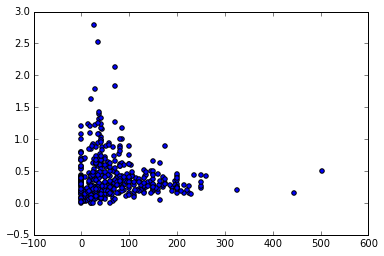

In [58]:
# plt.scatter(x, y)
# print rgr.predict(x).shape
# plt.plot(x, rgr.predict(x.transpose(len(x), 1)), color='green', linewidth=3)

In [53]:
print x.shape, y.shape

(435,) (1, 435)
